## Import Libraries
Import essential libraries for data manipulation, visualization, and mathematical operations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

## Load Data and Parse Dates
Load the raw transaction data and convert the `TransactionStartTime` column to datetime format for time-based analysis.

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [3]:
df.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
6883,TransactionId_70879,BatchId_24204,AccountId_2331,SubscriptionId_177,CustomerId_2745,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2018-11-23 16:38:55+00:00,2,0
11741,TransactionId_68187,BatchId_64600,AccountId_4841,SubscriptionId_3829,CustomerId_1632,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2018-11-30 13:52:58+00:00,2,0
68626,TransactionId_7848,BatchId_22177,AccountId_4841,SubscriptionId_3829,CustomerId_647,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-01-23 04:39:45+00:00,2,0
86104,TransactionId_3211,BatchId_55810,AccountId_3552,SubscriptionId_2931,CustomerId_3989,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-05 12:21:42+00:00,4,0
33154,TransactionId_65616,BatchId_136054,AccountId_4841,SubscriptionId_3829,CustomerId_4336,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2018-12-19 19:27:45+00:00,2,0


## Data Info
Display information about the DataFrame, including column data types and non-null counts.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

##  Data Shape and Summary Statistics
Print the shape of the DataFrame and show summary statistics for numerical columns.

In [5]:
print(df.shape)
df.describe()

(95662, 16)


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Convert Columns to Category Type
Convert selected columns to the `category` data type to optimize memory and prepare for categorical analysis.

In [6]:
df['ProviderId'] = df['ProviderId'].astype('category')
df['ProductCategory'] = df['ProductCategory'].astype('category')
df['ProductId'] = df['ProductId'].astype('category')
df['PricingStrategy'] = df['PricingStrategy'].astype('category')
df['ChannelId'] = df['ChannelId'].astype('category')

## Check for Missing Values
Print the number of missing values in each column.

In [7]:
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


## Plot Histograms for Numerical Features
Visualize the distribution of all numerical features using histograms.

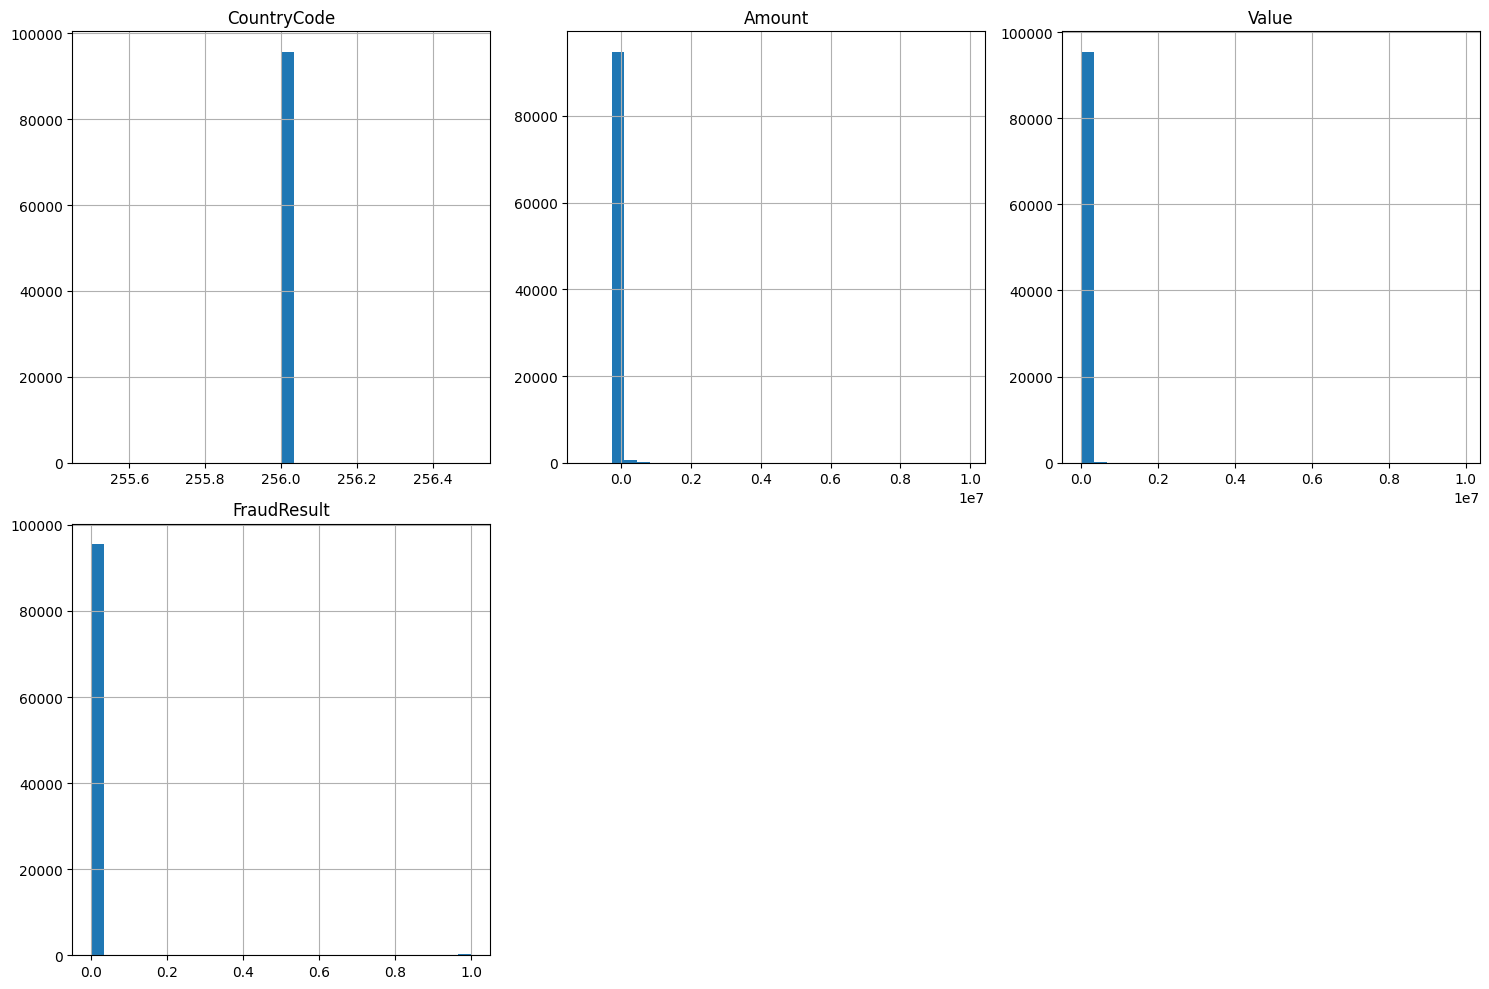

In [8]:
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=[np.number]).columns

df[numerical_features].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()

## Count Plots for Categorical Features
Draw count plots for each categorical feature to visualize the frequency of each category.

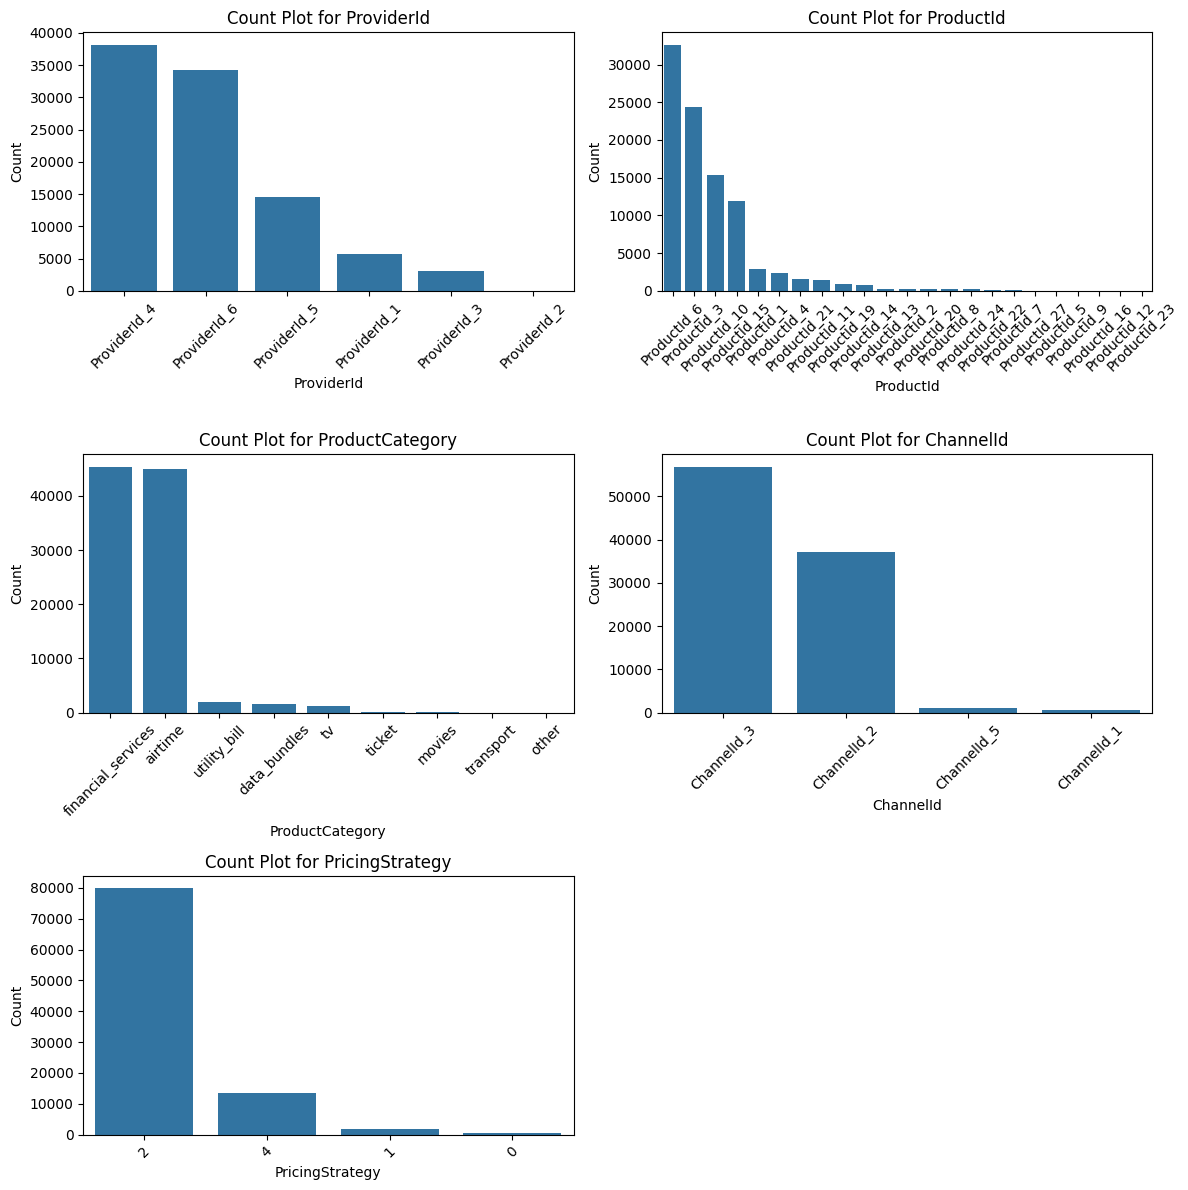

In [9]:
categorical_features = df.select_dtypes(include=['category']).columns

n = len(categorical_features)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlation Matrix and Heatmap
Compute and visualize the correlation matrix for selected numerical features.

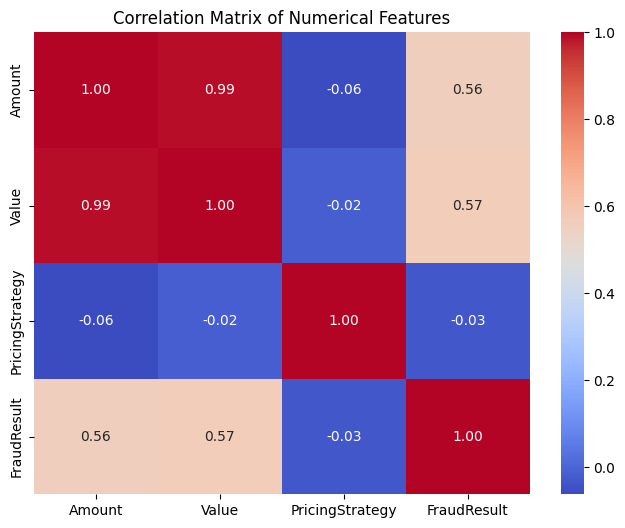

In [10]:
# Compute correlation matrix for numerical features
corr_matrix = df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##  Box Plots for Outlier Detection
Draw box plots for key numerical features to identify potential outliers.

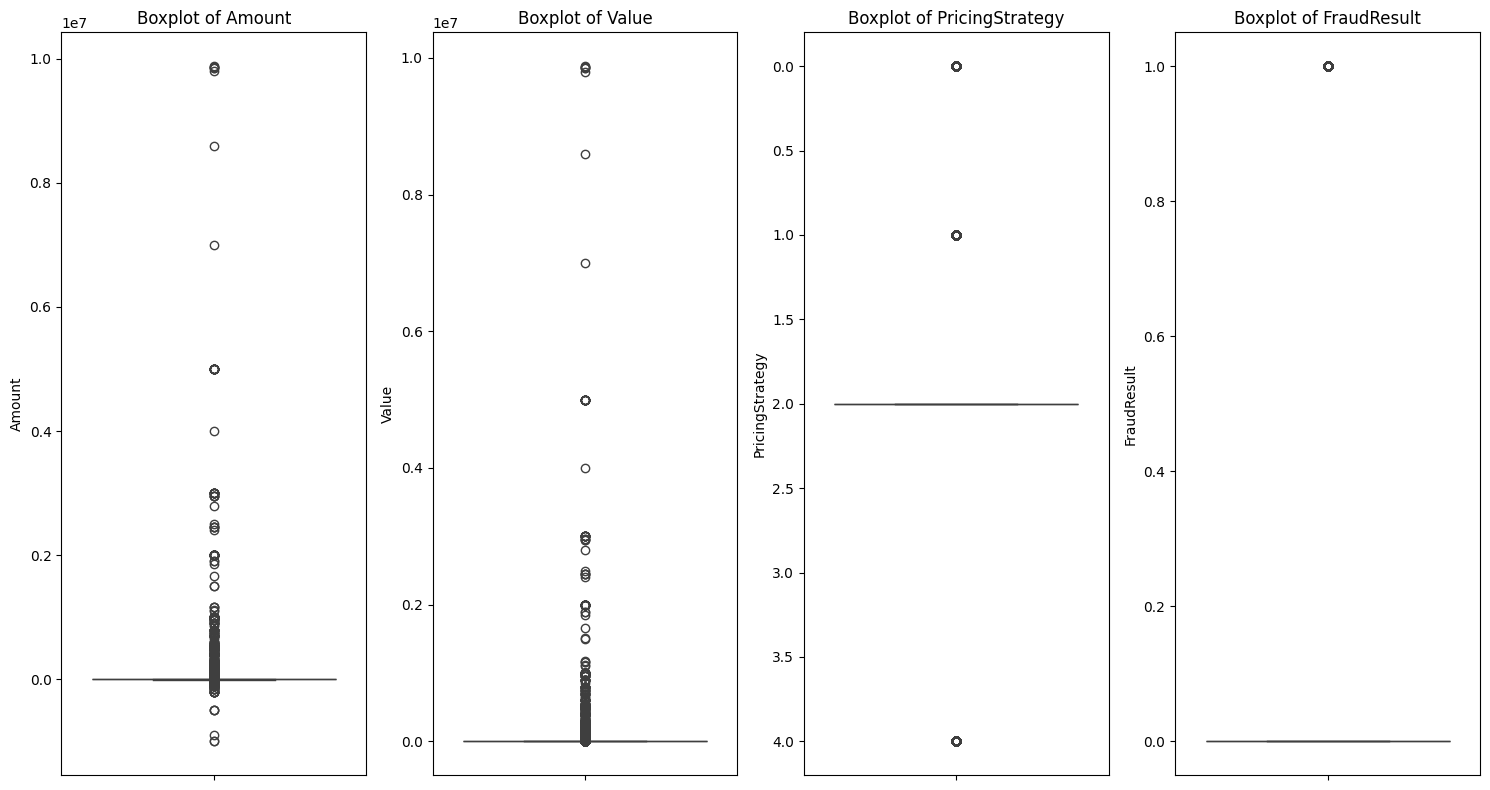

In [11]:
# Box plots for numerical features to identify outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Amount', 'Value', 'PricingStrategy', 'FraudResult'], 1):
    plt.subplot(1, len(['Amount', 'Value', 'PricingStrategy', 'FraudResult']), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## RFM Feature Engineering
Calculate Recency, Frequency, and Monetary (RFM) metrics for each customer for customer segmentation.

In [12]:
from datetime import timedelta

# Set the snapshot date to one day after the last transaction date
snapshot_date = df['TransactionStartTime'].max() + timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (snapshot_date - x.max()).days,
    'TransactionId': 'count',
    'Amount': 'sum'
}).rename(columns={
    'TransactionStartTime': 'Recency',
    'TransactionId': 'Frequency',
    'Amount': 'Monetary'
}).reset_index()

rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,84,1,-10000.0
1,CustomerId_10,84,1,-10000.0
2,CustomerId_1001,90,5,20000.0
3,CustomerId_1002,26,11,4225.0
4,CustomerId_1003,12,6,20000.0


In [14]:
rfm.shape

(3742, 4)

## Visualize RFM Distributions
Plot the distributions of Recency, Frequency, and Monetary values for customer analysis.

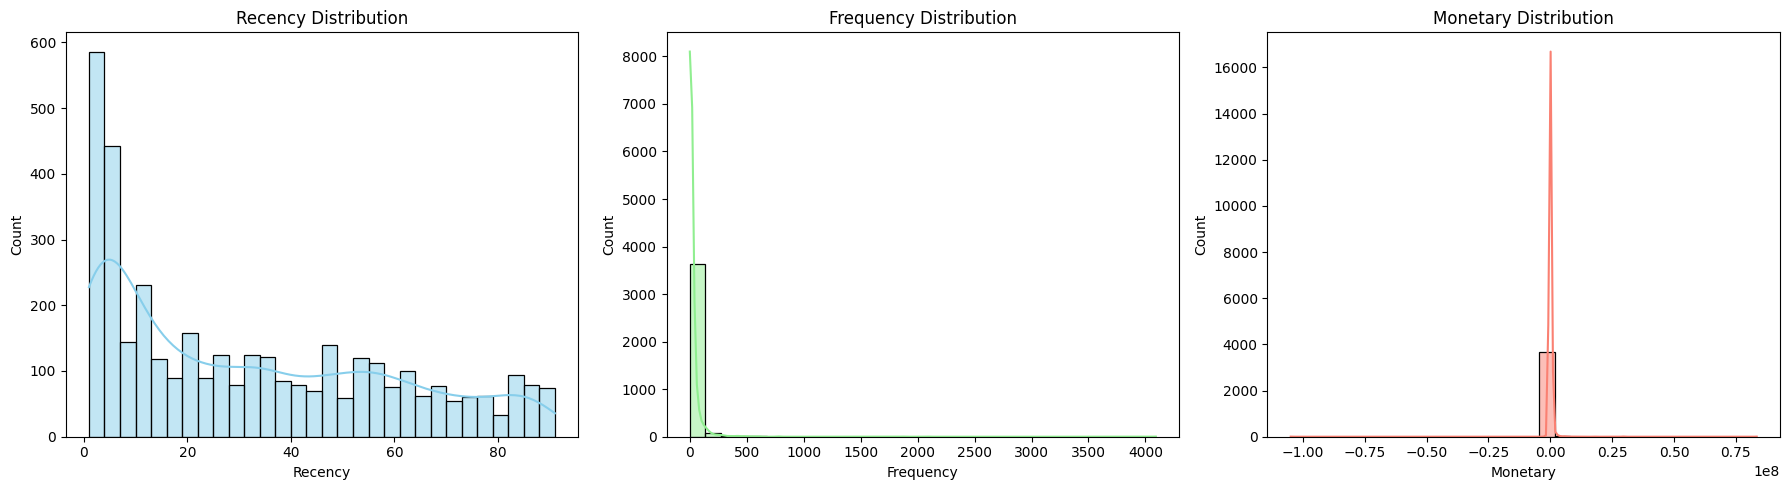

In [13]:
# Visualize the RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Distribution') 

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()